# Recipe data from https://www.kaggle.com/hugodarwood/epirecipes

In [1]:
from collections import Counter
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Open recipe json as dataframe

In [6]:
recipe_file = "/Users/Carol/Dropbox/epicurious-recipes-with-rating-and-nutrition/full_format_recipes.json"

In [7]:
recipe_df = pd.read_json(recipe_file, orient='records')
recipe_df.head(2)

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap"
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.0,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.0,4.375,1439.0,Boudin Blanc Terrine with Red Onion Confit


## Summary stats

In [4]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
calories       15976 non-null float64
categories     20111 non-null object
date           20111 non-null datetime64[ns]
desc           13495 non-null object
directions     20111 non-null object
fat            15908 non-null float64
ingredients    20111 non-null object
protein        15929 non-null float64
rating         20100 non-null float64
sodium         15974 non-null float64
title          20111 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.7+ MB


In [5]:
recipe_df.describe()

,calories,fat,protein,rating,sodium
count,1.597600e+04,1.590800e+04,15929.000000,20100.000000,1.597400e+04
mean,6.307857e+03,3.460975e+02,99.946199,3.713060,6.211474e+03
std,3.585851e+05,2.043102e+04,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.980000e+02,7.000000e+00,3.000000,3.750000,8.000000e+01
50%,3.310000e+02,1.700000e+01,8.000000,4.375000,2.940000e+02
75%,5.860000e+02,3.300000e+01,27.000000,4.375000,7.110000e+02
max,3.011122e+07,1.722763e+06,236489.000000,5.000000,2.767511e+07


Text(0, 0.5, 'Counts')

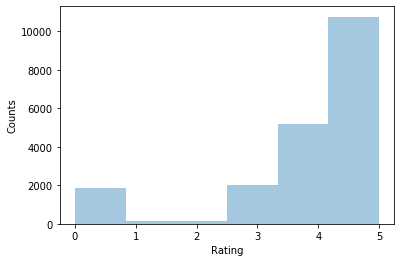

In [6]:
sns.distplot(recipe_df['rating'].dropna(),bins=6, kde=False)
plt.xlabel('Rating')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

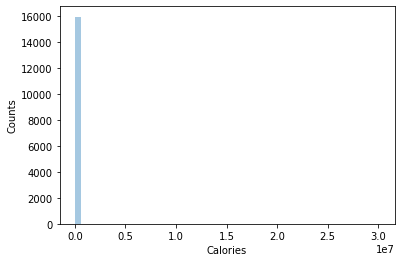

In [8]:
sns.distplot(recipe_df['calories'].dropna(), kde=False)
plt.xlabel('Calories')
plt.ylabel('Counts')

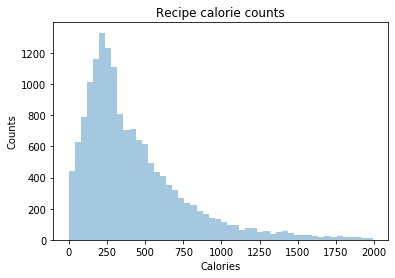

In [12]:
# There are some outliers making the plot above look ridiculous.
# just plot the range below 2000 calories
reasonable_cals = recipe_df[recipe_df['calories']<2000]
sns.distplot(reasonable_cals['calories'].dropna(),  kde=False)
plt.xlabel('Calories')
plt.ylabel('Counts')
plt.title("Recipe calorie counts")
plt.xlim()
plt.savefig("/Users/Carol/Dropbox/epicurious-recipes-with-rating-and-nutrition/plots/calories.jpg")

Text(0, 0.5, 'Counts')

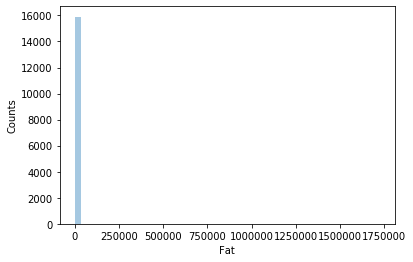

In [9]:
sns.distplot(recipe_df['fat'].dropna(), kde=False)
plt.xlabel('Fat')
plt.ylabel('Counts')

(-9.95, 208.94999999999996)

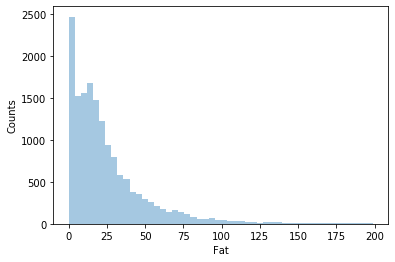

In [10]:
# fat outliers are also ruining the fat plot
reasonable_fat = recipe_df[recipe_df['fat']<200]
sns.distplot(reasonable_fat['fat'].dropna(), kde=False)
plt.xlabel('Fat')
plt.ylabel('Counts')
plt.xlim()

Text(0, 0.5, 'Counts')

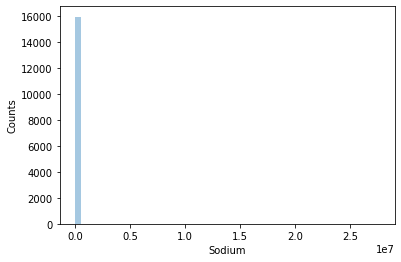

In [11]:
sns.distplot(recipe_df['sodium'].dropna(), kde=False)
plt.xlabel('Sodium')
plt.ylabel('Counts')

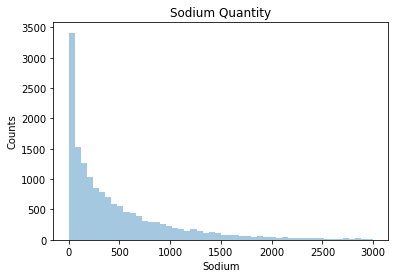

In [13]:
# same deal with the sodium. plot without outliers.
reasonable_sodium = recipe_df[recipe_df['sodium']<3000]
sns.distplot(reasonable_sodium['sodium'].dropna(), kde=False)
plt.xlabel('Sodium')
plt.ylabel('Counts')
plt.xlim()
plt.title("Sodium Quantity")
plt.savefig("/Users/Carol/Dropbox/epicurious-recipes-with-rating-and-nutrition/plots/sodium.jpg")

Text(0, 0.5, 'Counts')

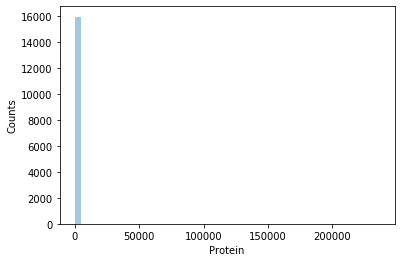

In [13]:
sns.distplot(recipe_df['protein'].dropna(), kde=False)
plt.xlabel('Protein')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

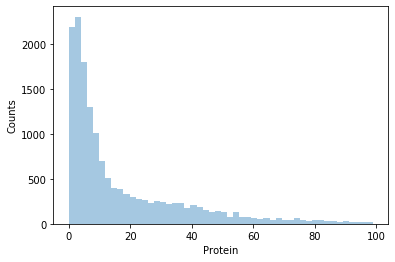

In [14]:
# plot protein without outliers 
reasonable_protein = recipe_df[recipe_df['protein']<100]
sns.distplot(reasonable_protein['protein'].dropna(),kde=False)
plt.xlabel('Protein')
plt.ylabel('Counts')

## There are some insanely high numbers for calories, fat, etc.  Take a look at some outliers.

### Findings:   
In general, the nutrition info is hard to interpet. I can't tell here whether calorie counts are supposed to be per serving, or in total. Also, what are the units for each nutrient? For calories, are the units Kcal or Cal? What about sodium? If we assume mg, the lamb rice pilaf contains 3 kilos of sodium, which doesn't seem possible. The numbers may be corrupted.

In [15]:
high_cal = recipe_df[recipe_df.calories > 10000]
high_cal.shape

(21, 11)

In [16]:
high_cal

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
1308,4157357.0,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",2007-08-24 18:04:29.000,"This lamb-rich, Uzbek-style pilaf is typical o...",[Wash rice in several changes of cold water in...,221495.0,"[3 cups basmati rice (7 ounces), 1 medium onio...",236489.0,5.000,3134853.0,"Rice Pilaf with Lamb, Carrots, and Raisins"
1843,12010.0,"[Milk/Cream, Beef, Fish, Onion, Bake, Vinegar,...",2004-08-20 04:00:00.000,None,"[In a heavy saucepan boil vinegar, water, onio...",1115.0,"[3/4 cup balsamic vinegar, 1 1/2 cups water, 2...",403.0,4.375,18212.0,Bacon-Wrapped Trout Stuffed with Balsamic Onio...
2985,4518216.0,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",2008-05-12 21:04:07.000,Köfte are a street-food favorite in the Middle...,"[Soak bread in water to cover 30 minutes, then...",44198.0,"[3 slices firm white sandwich bread, torn into...",166471.0,5.000,7540990.0,Lamb Köfte with Tarator Sauce
3290,19576.0,"[Beef, Braise, Beef Rib, Red Wine, Fall, Bon A...",2004-08-20 04:00:00.000,Tiring of the ultra-refined nouvelle cuisine t...,[Stir flour and allspice in medium bowl to ble...,1818.0,"[1/4 cup all-purpose flour, 1 teaspoon (genero...",723.0,3.750,2950.0,Braised Short Ribs with Red Wine Gravy
5165,3358029.0,"[Fruit, Dessert, Bake, Christmas, Thanksgiving...",2004-08-20 04:00:00.000,None,[Position rack in center of oven and preheat t...,186642.0,"[1/2 cup applejack brandy or brandy, 1/2 cup d...",58324.0,3.125,3449373.0,Caramelized Apple and Pear Pie
6400,29997918.0,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",2006-07-20 20:48:24.000,If you've never had pie made from wild blueber...,[Put a large baking sheet on oven rack in midd...,1716279.0,"[1 1/4 cups packed light brown sugar, 5 tables...",200210.0,4.375,27570999.0,Deep-Dish Wild Blueberry Pie
6678,16050.0,"[Beef, Citrus, Fruit, Ginger, Braise, Super Bo...",2004-08-20 04:00:00.000,Hoisin sauce is sold at Asian markets and in t...,[Preheat oven to 300°F. Using vegetable peeler...,1480.0,"[4 large oranges, 3/4 cup hoisin sauce, 1/3 cu...",592.0,4.375,2629.0,Braised Orange-Ginger Short Ribs with Dried Ap...
6945,3358273.0,"[Chocolate, Nut, Dessert, Bake, Christmas, Tha...",2004-08-20 04:00:00.000,None,[Position rack in center of oven and preheat t...,186660.0,[4 ounces bittersweet (not unsweetened) or sem...,58334.0,3.125,3449512.0,Chocolate-Almond Pie
8232,24117.0,"[Lamb, Mushroom, Mustard, Quick & Easy, Father...",2009-04-14 04:00:00.000,"Rubbed all over with a mixture of garlic, fres...",[Prepare grill for direct-heat cooking over me...,2228.0,"[2 ounces dried porcini mushrooms, 2 cups boil...",940.0,5.000,4382.0,Grilled Lamb Chops with Porcini Mustard
8917,22312.0,"[Chicken, Quick & Easy, Backyard BBQ, Spice, G...",2004-08-20 04:00:00.000,Can be prepared in 45 minutes or less.,"[Make salsa., Prepare grill., Pat chicken dry ...",1007.0,[3 whole boneless chicken breasts with skin (a...,332.0,3.750,13820.0,Grilled Cumin Chicken Breasts with Avocado Salsa


In [17]:
high_cal.iloc[0, 6]

['3 cups basmati rice (7 ounces)',
 '1 medium onion, chopped',
 '3 tablespoons olive oil',
 '1 1/2 pounds boneless lamb shank (from 2 1/4 pounds bone-in shanks), cut into 1 1/2- to 2-inch pieces',
 '4 1/2 to 5 cups water, divided',
 '2 large carrots, cut into 1/8-inch-thick matchsticks',
 '1 cup raisins (6 ounces)',
 'Accompaniments: chicken kebabs and cilantro garlic yogurt sauce']

## Example directions

Directions have been split into lists of strings, with one step per list item.

In [28]:
recipe_df.loc[0, 'directions']

['1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.',
 '2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.',
 '3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.']

In [30]:
recipe_df.loc[0, 'ingredients']

['4 cups low-sodium vegetable or chicken stock',
 '1 cup dried brown lentils',
 '1/2 cup dried French green lentils',
 '2 stalks celery, chopped',
 '1 large carrot, peeled and chopped',
 '1 sprig fresh thyme',
 '1 teaspoon kosher salt',
 '1 medium tomato, cored, seeded, and diced',
 '1 small Fuji apple, cored and diced',
 '1 tablespoon freshly squeezed lemon juice',
 '2 teaspoons extra-virgin olive oil',
 'Freshly ground black pepper to taste',
 '3 sheets whole-wheat lavash, cut in half crosswise, or 6 (12-inch) flour tortillas',
 '3/4 pound turkey breast, thinly sliced',
 '1/2 head Bibb lettuce']

In [31]:
recipe_df.loc[3, 'directions']

['Heat oil in heavy large skillet over medium-high heat. Add onion; sauté until translucent and beginning to brown, about 4 minutes. Add wine and anchovy paste. Boil until reduced to 3/4 cup, about 3 minutes. Add tomatoes with juice; bring to boil.',
 'Sprinkle fish with salt and pepper. Add fish to skillet atop tomato mixture. Reduce heat to low, cover, and simmer until fish is cooked through, about 9 minutes. Using slotted metal spatula, transfer fish to plate and tent with foil to keep warm. Mix olives, 2 teaspoons oregano, and orange peel into sauce in skillet. Increase heat to high and boil until sauce is reduced and thickened, about 6 minutes. Season to taste with salt and pepper. Place 1 fish fillet on each of 4 plates. Pour sauce over and around fish, sprinkle with remaining 1 teaspoon oregano, and serve with warm toasted bread.']

In [33]:
recipe_df.loc[3, 'desc']

'The Sicilian-style tomato sauce has tons of Mediterranean flavor, thanks to the orange peel, olives, and oregano.'

In [38]:
recipe_df.loc[4, 'ingredients']

['1 12-ounce package frozen spinach soufflé, thawed',
 '1/2 pound extra-wide egg noodles, freshly cooked',
 '1 cup sour cream',
 '2 tablespoons purchased pesto sauce',
 '1/4 teaspoon ground nutmeg',
 '1 cup grated sharp cheddar cheese']

# Explore labeled data set

In [14]:
conll_file = "/Users/Carol/Documents/epicurious-recipes-with-rating-and-nutrition/food_gold.conll"
entities = []
current_ent = ""
with open(conll_file, 'r') as infile:
    for line in infile:
        if len(line.split()) != 5:
            continue
        token, *items, label = line.split()
        if label == 'B-FOOD':
            if current_ent:
                entities.append(current_ent)
                current_ent = token
            else:
                current_ent = token
        elif label == "I-FOOD":
            current_ent += " {}".format(token)              

In [20]:
# break up multitoken entities to extract all tokens
tokens = []
for e in entities:
    tokens.extend(e.split())

In [27]:
token_counts = Counter(tokens)
for token in token_counts.most_common(20):
    print(token)

('salt', 315)
('pepper', 232)
('oil', 169)
('mixture', 167)
('sugar', 150)
('butter', 145)
('sauce', 132)
('chicken', 113)
('cream', 109)
('juice', 99)
('garlic', 93)
('onion', 90)
('lemon', 77)
('flour', 76)
('dough', 76)
('onions', 75)
('cheese', 74)
('water', 69)
('cake', 68)
('potatoes', 67)


In [28]:
food_counts = Counter(entities)
for food in food_counts.most_common(20):
    print(food)

('salt', 301)
('pepper', 202)
('oil', 122)
('butter', 122)
('sugar', 114)
('sauce', 100)
('chicken', 89)
('garlic', 78)
('dough', 69)
('onion', 66)
('flour', 63)
('onions', 62)
('water', 59)
('cream', 56)
('tomatoes', 55)
('eggs', 51)
('cake', 50)
('potatoes', 50)
('vegetables', 48)
('lemon juice', 47)


In [30]:
# find the most common two-word foods
bigrams = [e for e in entities if len(e.split())==2]
b_counter = Counter(bigrams)
for b in b_counter.most_common(10):
    print(b)

('lemon juice', 47)
('olive oil', 29)
('lime juice', 16)
('flour mixture', 12)
('sesame seeds', 11)
('egg mixture', 10)
('pan juices', 10)
('baking powder', 10)
('cream cheese', 10)
('green onions', 10)


In [31]:
# find the most common three-word foods
trigrams = [e for e in entities if len(e.split())==3]
t_counter = Counter(trigrams)
for t in t_counter.most_common(10):
    print(t)

('red pepper flakes', 7)
('half and half', 3)
('wild rice mixture', 3)
('orange juice mixture', 3)
('candied lemon peels', 2)
('chopped green onions', 2)
('vegetable oil spray', 2)
('celery root slices', 2)
('hot cream mixture', 2)
('pasta cooking liquid', 2)
